<a href="https://colab.research.google.com/github/RNF24/Detect-Drug-Using-YOLOv8/blob/main/Detect_Drug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
!pip install ultralytics --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 7.3 MB/s eta 0:00:00


# Download Dataset

In [ ]:
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("kabul-university-evptq").project("drug-name-detection")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.


Extracting Dataset Version Zip to drug-name-detection-1 in yolov8:: 100%|██████████| 3658/3658 [00:00<00:00, 6732.24it/s]


#Train

In [ ]:
from ultralytics import YOLO

# Create a YOLO model instance
model = YOLO('yolov8m.pt')

# Train the model
results = model.train(data='/content/drug-name-detection-1/data.yaml', epochs=25, imgsz=640, plots=True)

Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drug-name-detection-1/data.yaml, epochs=25, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 755k/755k [00:00<00:00, 98.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 322MB/s]


AMP: checks passed ✅


train: Scanning /content/drug-name-detection-1/train/labels... 1276 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1276/1276 [00:00<00:00, 1884.59it/s]


train: New cache created: /content/drug-name-detection-1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 182, len(boxes) = 1277. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drug-name-detection-1/valid/labels... 365 images, 2 backgrounds, 0 corrupt: 100%|██████████| 365/365 [00:00<00:00, 582.23it/s]

val: New cache created: /content/drug-name-detection-1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 44, len(boxes) = 364. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      7.05G      1.984      3.147      1.718         23        640: 100%|██████████| 80/80 [00:44<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.51it/s]

                   all        365        364    0.00516     0.0769    0.00096   0.000269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      7.26G      2.015      2.571      1.859         18        640: 100%|██████████| 80/80 [00:39<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.82it/s]

                   all        365        364     0.0046     0.0412    0.00282   0.000542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      7.27G      1.926      2.489      1.842         17        640: 100%|██████████| 80/80 [00:40<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]

                   all        365        364     0.0723      0.104     0.0324     0.0123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      7.29G      1.895      2.379      1.808         22        640: 100%|██████████| 80/80 [00:40<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.12it/s]

                   all        365        364      0.158      0.118     0.0644     0.0266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25       7.3G       1.84      2.331      1.742         19        640: 100%|██████████| 80/80 [00:39<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.09it/s]

                   all        365        364    0.00894      0.201    0.00582    0.00193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      7.29G      1.818      2.306      1.746         16        640: 100%|██████████| 80/80 [00:39<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.93it/s]

                   all        365        364   0.000372      0.102   0.000209   8.14e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      7.29G      1.725      2.201      1.648         29        640: 100%|██████████| 80/80 [00:39<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.23it/s]

                   all        365        364      0.238      0.297      0.198     0.0799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25       7.3G      1.738      2.185      1.663         14        640: 100%|██████████| 80/80 [00:40<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.99it/s]

                   all        365        364      0.237       0.14     0.0902     0.0408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25       7.3G      1.693      2.112      1.648         22        640: 100%|██████████| 80/80 [00:40<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.22it/s]

                   all        365        364      0.316      0.338      0.239      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25       7.3G      1.655      2.047      1.597         19        640: 100%|██████████| 80/80 [00:40<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.08it/s]

                   all        365        364      0.312      0.363      0.262      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      7.29G       1.65      2.036       1.58         20        640: 100%|██████████| 80/80 [00:41<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.14it/s]

                   all        365        364      0.341      0.381      0.301      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       7.3G      1.589      1.945      1.528         14        640: 100%|██████████| 80/80 [00:39<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.08it/s]

                   all        365        364      0.318      0.429      0.313       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25       7.3G      1.556      1.981      1.538         22        640: 100%|██████████| 80/80 [00:40<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.21it/s]

                   all        365        364      0.361      0.475      0.326       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25       7.3G      1.495      1.889      1.489         16        640: 100%|██████████| 80/80 [00:41<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.89it/s]

                   all        365        364      0.388       0.44      0.361      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      7.29G      1.496      1.869      1.492         20        640: 100%|██████████| 80/80 [00:39<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.22it/s]

                   all        365        364      0.431      0.495       0.39      0.217


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      7.29G      1.563      1.828      1.549         12        640: 100%|██████████| 80/80 [00:41<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.01it/s]

                   all        365        364      0.373      0.497      0.377      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      7.31G      1.492      1.701      1.488         12        640: 100%|██████████| 80/80 [00:39<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.68it/s]

                   all        365        364      0.479      0.478      0.429      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      7.29G      1.495      1.676      1.463         12        640: 100%|██████████| 80/80 [00:39<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.21it/s]

                   all        365        364       0.46      0.495      0.451      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      7.29G      1.453      1.639      1.458         12        640: 100%|██████████| 80/80 [00:39<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.10it/s]

                   all        365        364      0.547      0.555      0.515      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      7.31G      1.424      1.609      1.434         12        640: 100%|██████████| 80/80 [00:39<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.08it/s]

                   all        365        364      0.531      0.544      0.502       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      7.29G      1.374      1.533      1.399         12        640: 100%|██████████| 80/80 [00:39<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.04it/s]

                   all        365        364      0.549      0.516      0.539      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25       7.3G      1.389      1.501      1.404         12        640: 100%|██████████| 80/80 [00:40<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.95it/s]

                   all        365        364      0.547      0.538       0.54      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      7.29G      1.328       1.47      1.372         12        640: 100%|██████████| 80/80 [00:39<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.18it/s]

                   all        365        364      0.509      0.558      0.536       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      7.31G      1.343      1.458      1.364         12        640: 100%|██████████| 80/80 [00:39<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.23it/s]

                   all        365        364      0.559      0.577      0.555      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25       7.3G      1.303      1.391      1.326         12        640: 100%|██████████| 80/80 [00:39<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]

                   all        365        364      0.537      0.593      0.557      0.344



25 epochs completed in 0.366 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 52.0MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.47it/s]


                   all        365        364      0.537       0.59      0.557      0.344
Speed: 0.2ms preprocess, 9.9ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train2


# Evaluation Result

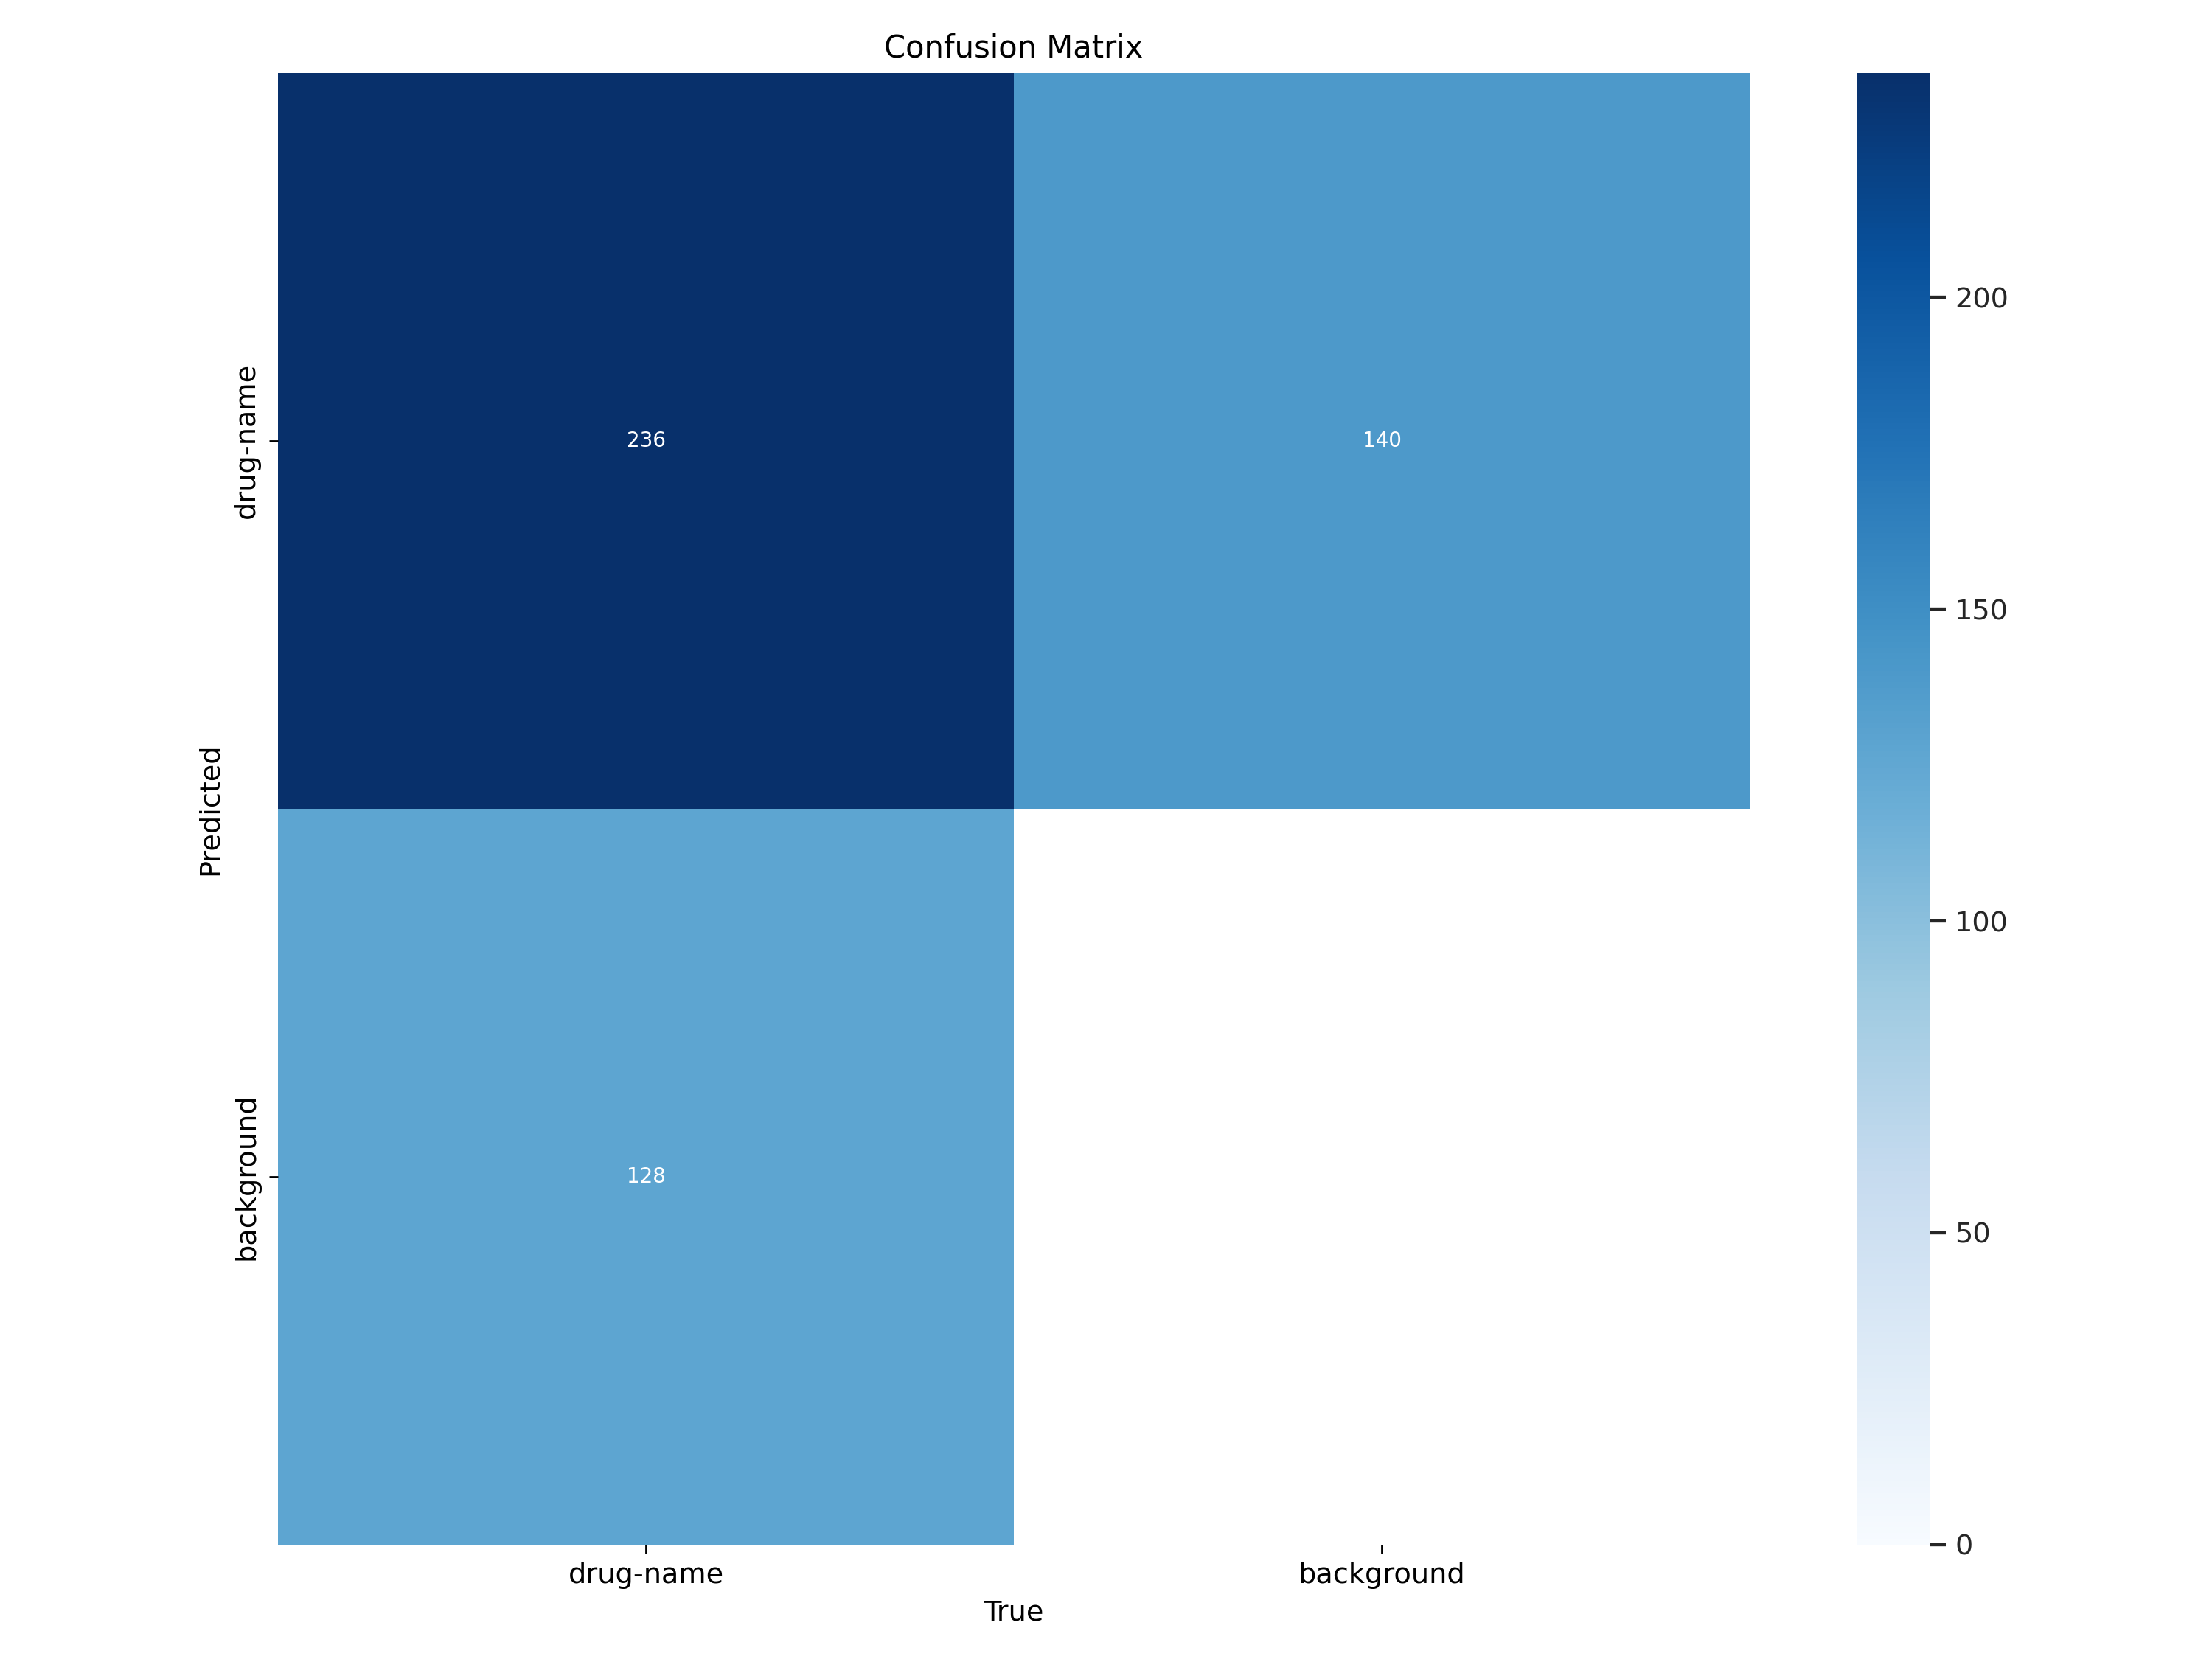

In [ ]:
from IPython.display import Image as IPImage, display

display(IPImage(filename='/content/runs/detect/train2/confusion_matrix.png', width=900))

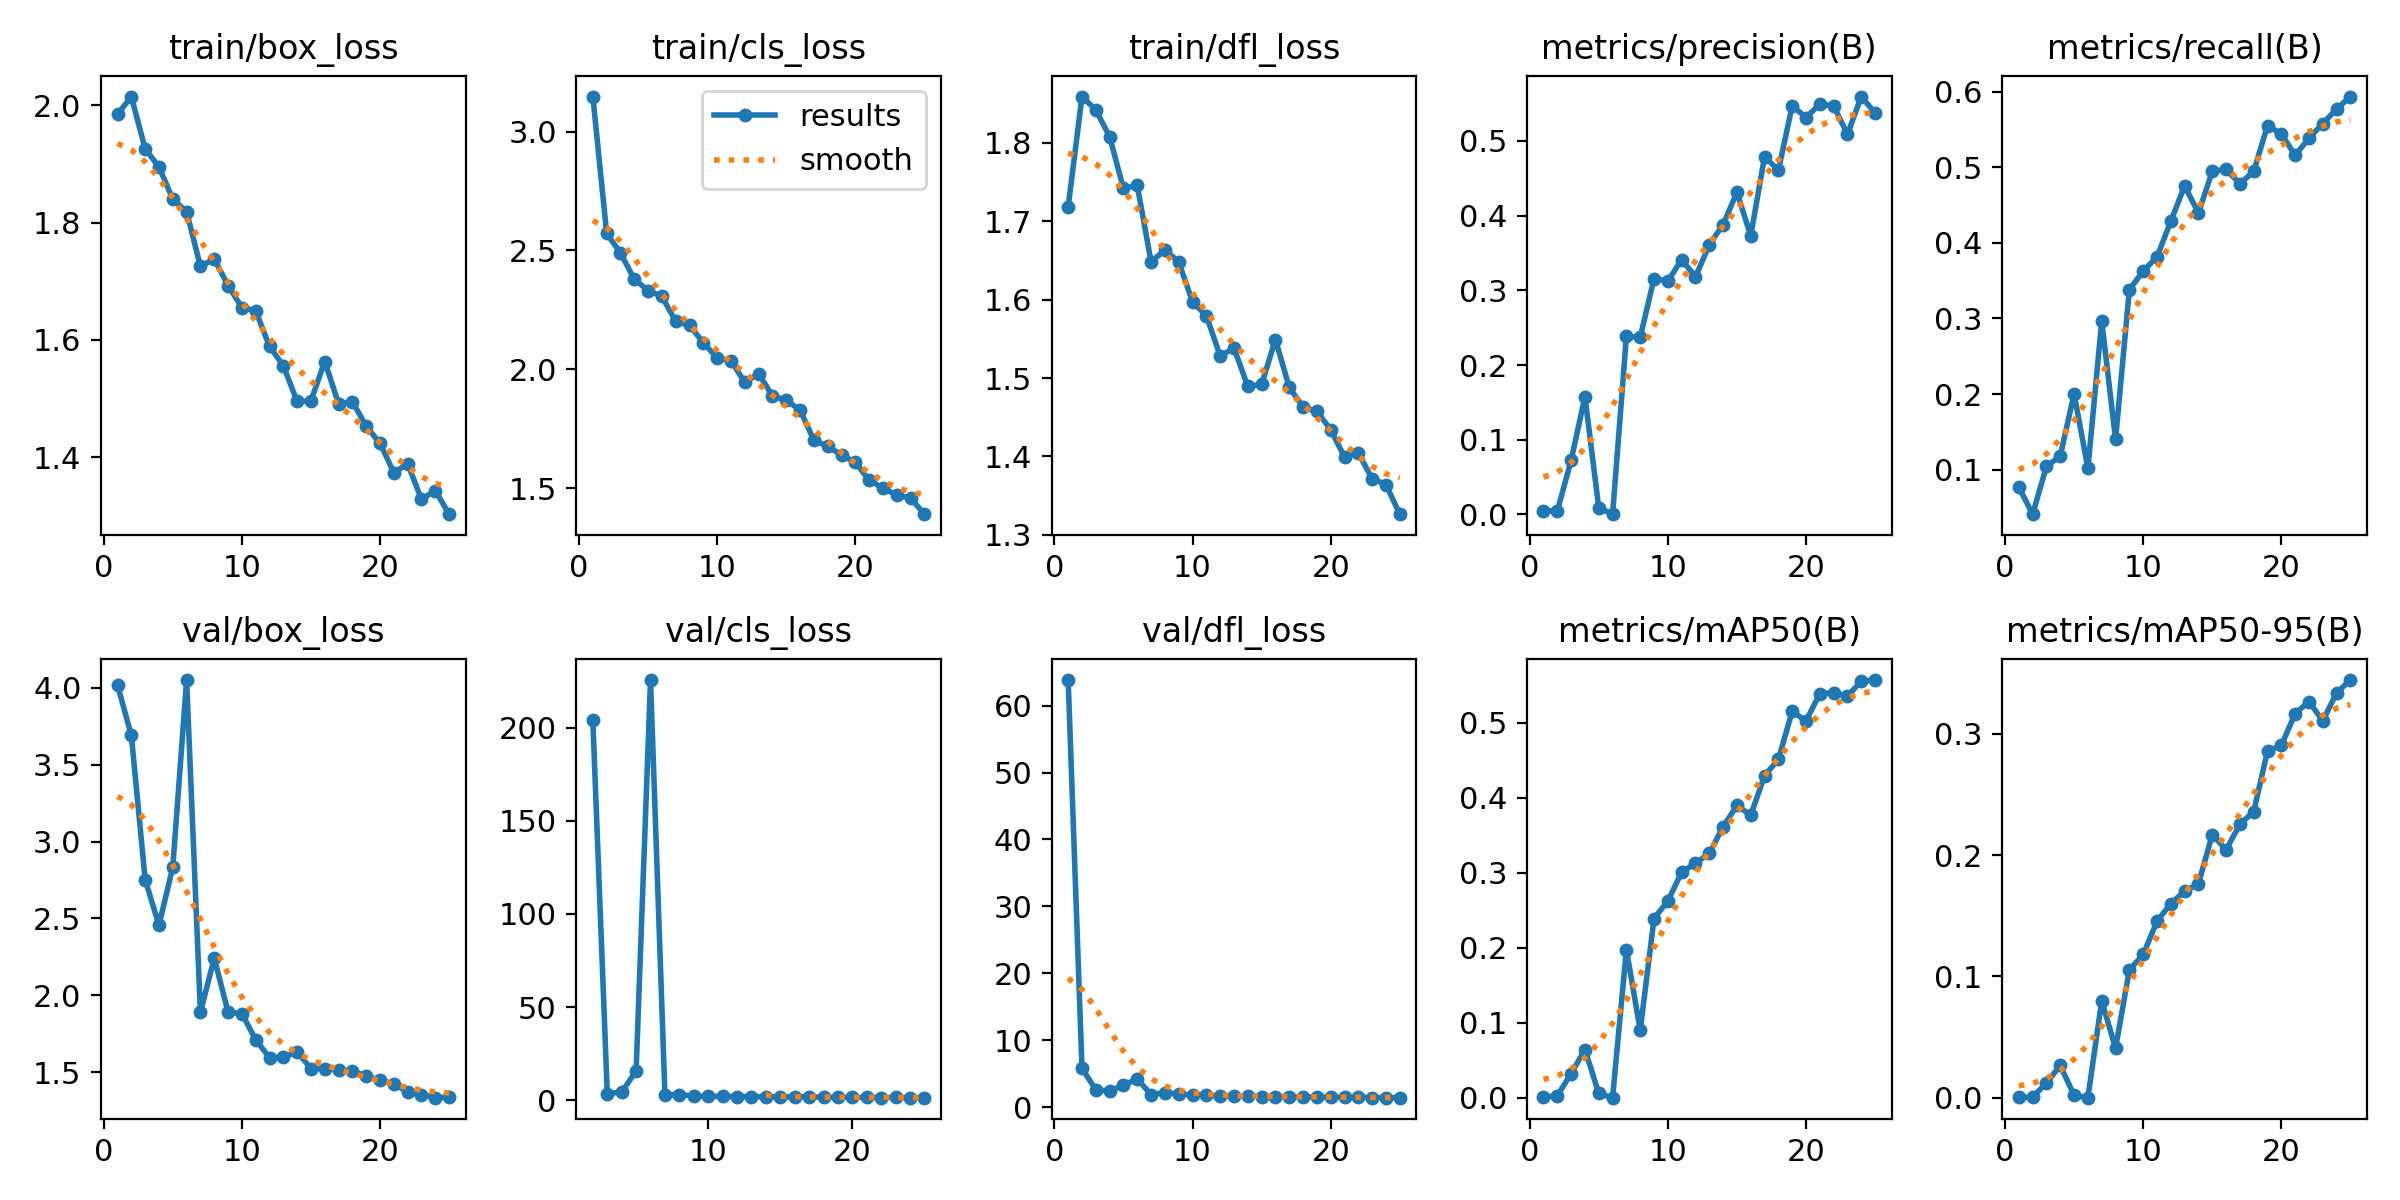

In [ ]:
display(IPImage(filename='/content/runs/detect/train2/results.png', width=600))

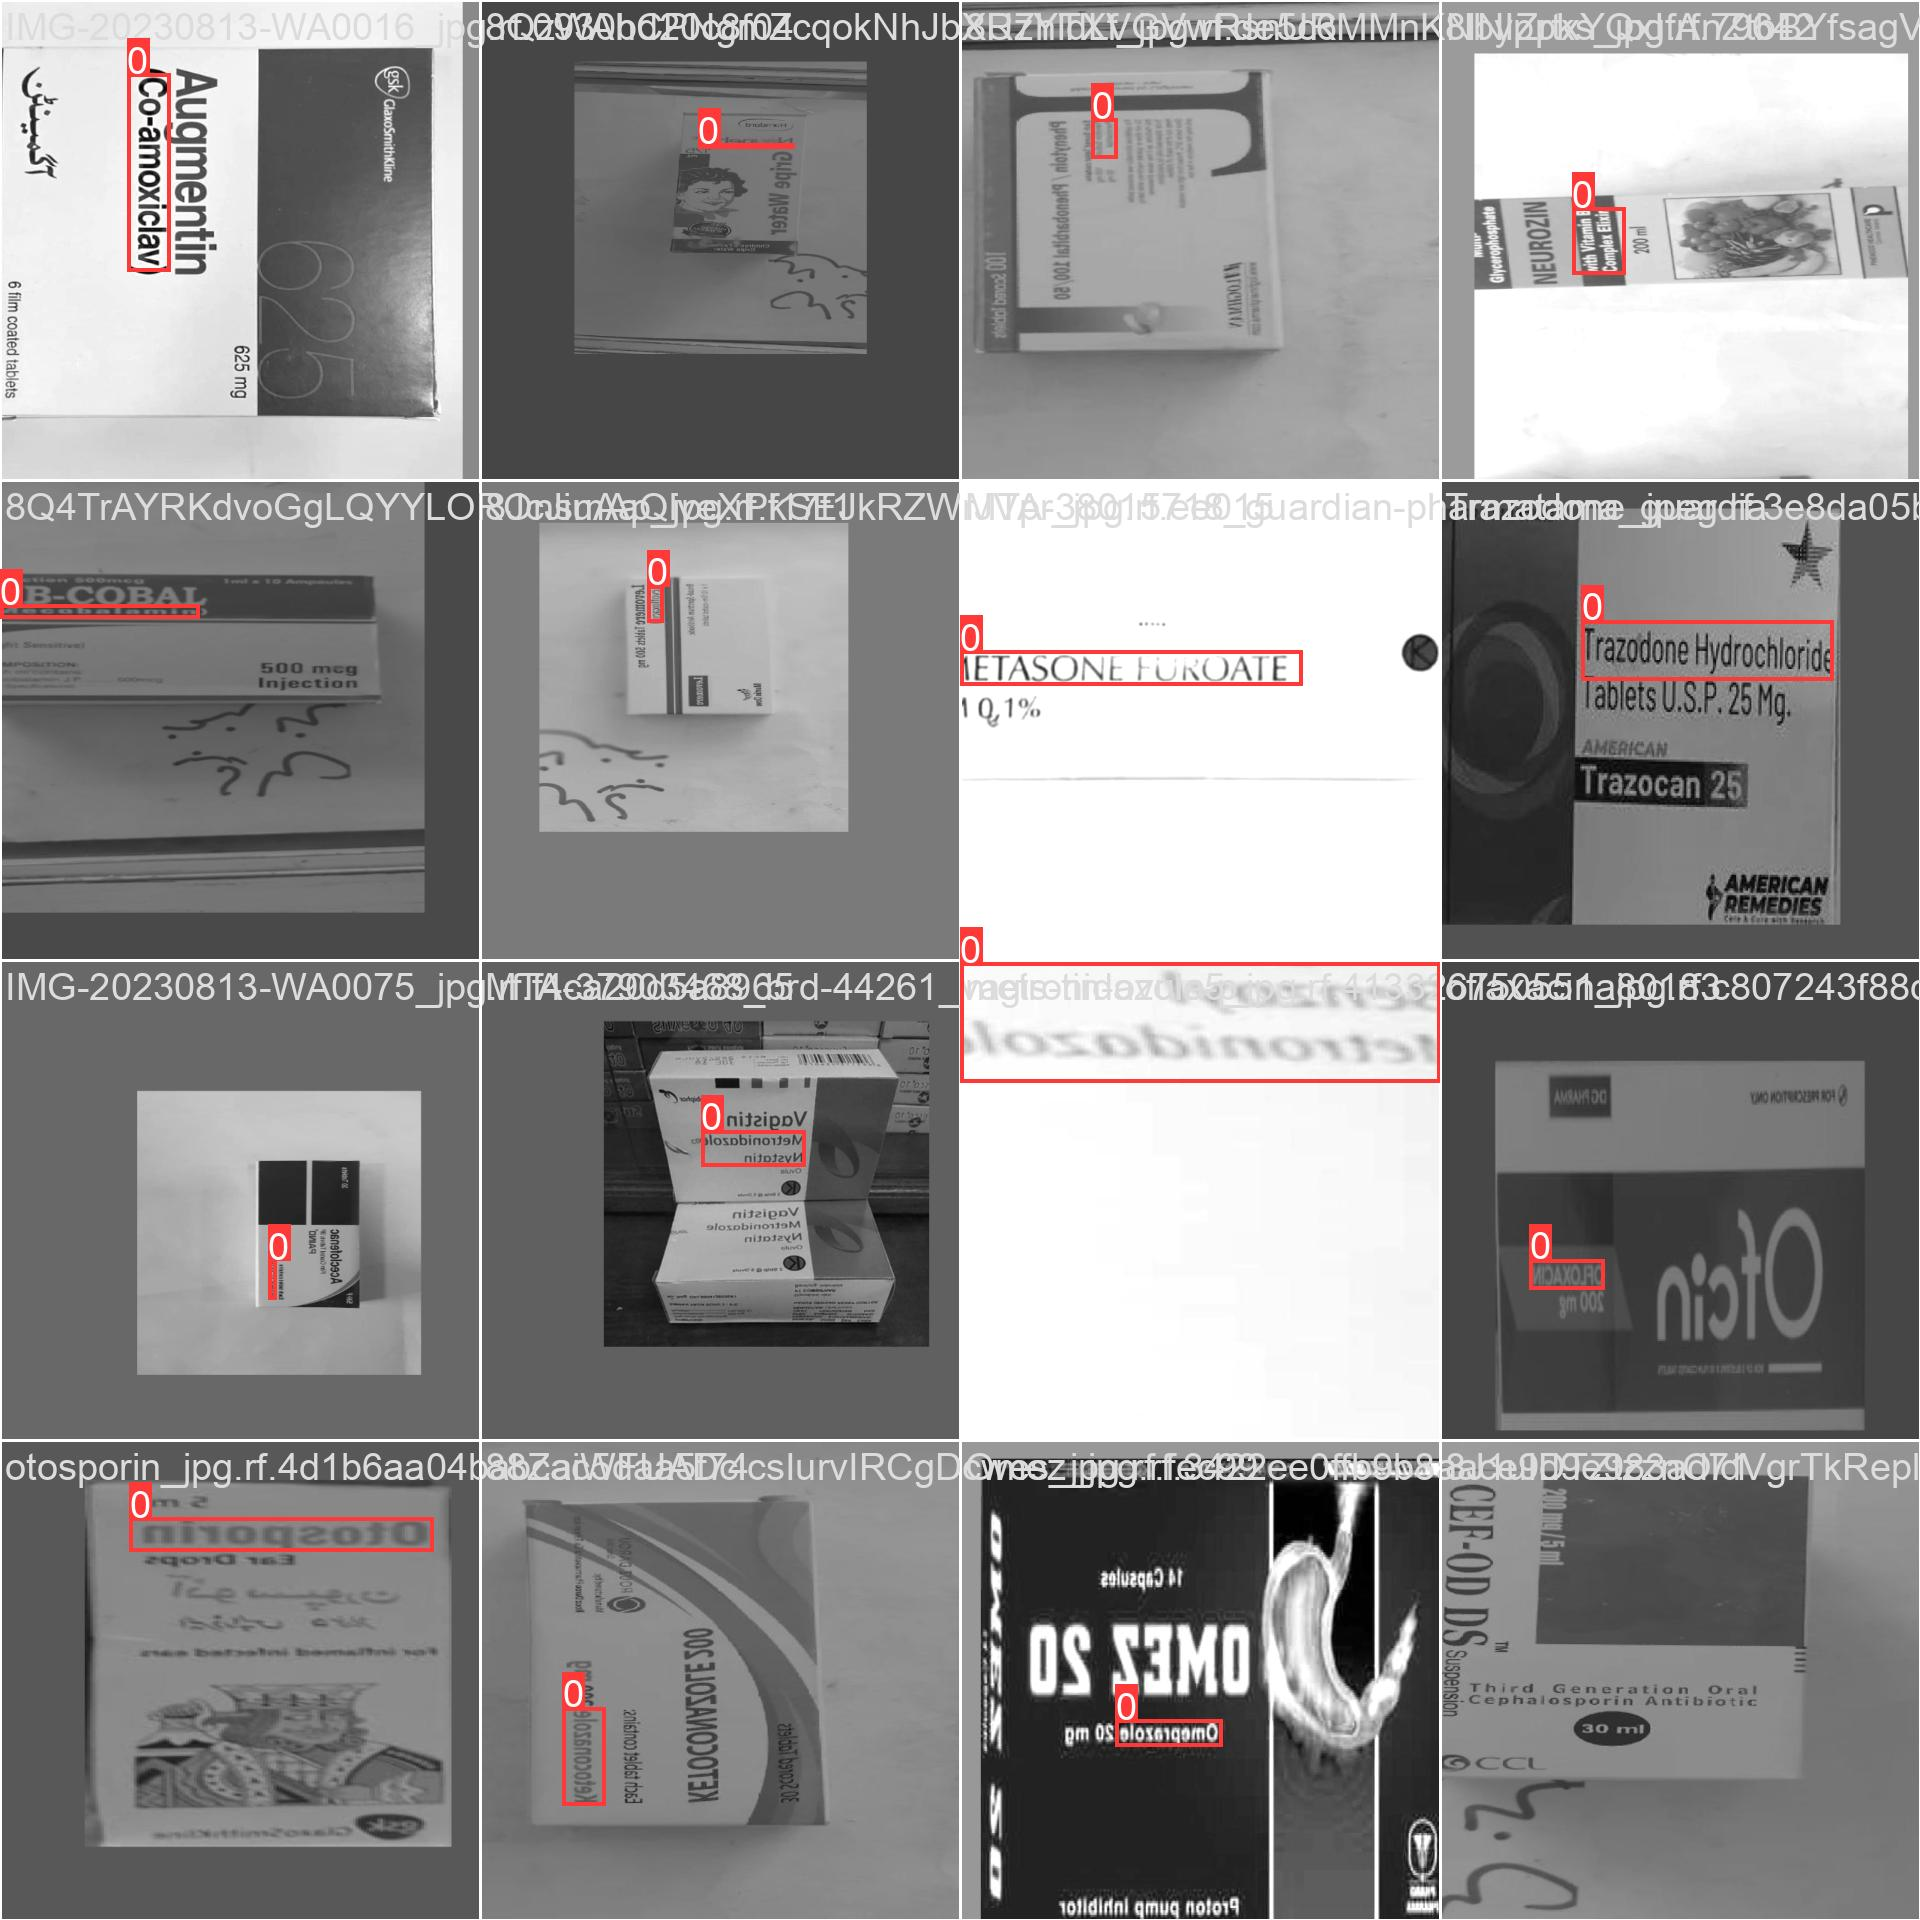

In [ ]:
#Display the data
display(IPImage(filename='/content/runs/detect/train2/train_batch1201.jpg', width=900))

# Validate

In [ ]:
metrics = model.val()

Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/drug-name-detection-1/valid/labels.cache... 365 images, 2 backgrounds, 0 corrupt: 100%|██████████| 365/365 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 44, len(boxes) = 364. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:12<00:00,  1.82it/s]


                   all        365        364      0.544      0.589      0.561      0.344
Speed: 0.6ms preprocess, 20.4ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train22


# Predict

In [ ]:
import glob
from PIL import Image

# Specify the directory where your images are located
directory_image = '/content/drug-name-detection-1/test/images/'

# Use glob to get a list of image file paths
path = glob.glob(directory_image + '*.jpg')

# Check if the path list is empty
if not path:
    print("No image files found.")
else:
    # Initialize a list to store the loaded images
    images = []

    # Load each image
    for image_path in path:
        image = Image.open(image_path)
        images.append(image)

    # Run inference on the list of loaded images
    model.predict(images, save=True, imgsz=640, plots=True, conf=0.5)


0: 640x640 1 drug-name, 1: 640x640 (no detections), 2: 640x640 1 drug-name, 3: 640x640 1 drug-name, 4: 640x640 1 drug-name, 5: 640x640 1 drug-name, 6: 640x640 (no detections), 7: 640x640 (no detections), 8: 640x640 (no detections), 9: 640x640 (no detections), 10: 640x640 1 drug-name, 11: 640x640 (no detections), 12: 640x640 1 drug-name, 13: 640x640 1 drug-name, 14: 640x640 (no detections), 15: 640x640 1 drug-name, 16: 640x640 (no detections), 17: 640x640 (no detections), 18: 640x640 1 drug-name, 19: 640x640 1 drug-name, 20: 640x640 (no detections), 21: 640x640 1 drug-name, 22: 640x640 (no detections), 23: 640x640 1 drug-name, 24: 640x640 1 drug-name, 25: 640x640 1 drug-name, 26: 640x640 1 drug-name, 27: 640x640 1 drug-name, 28: 640x640 (no detections), 29: 640x640 1 drug-name, 30: 640x640 (no detections), 31: 640x640 (no detections), 32: 640x640 (no detections), 33: 640x640 1 drug-name, 34: 640x640 (no detections), 35: 640x640 (no detections), 36: 640x640 1 drug-name, 37: 640x640 1 dr

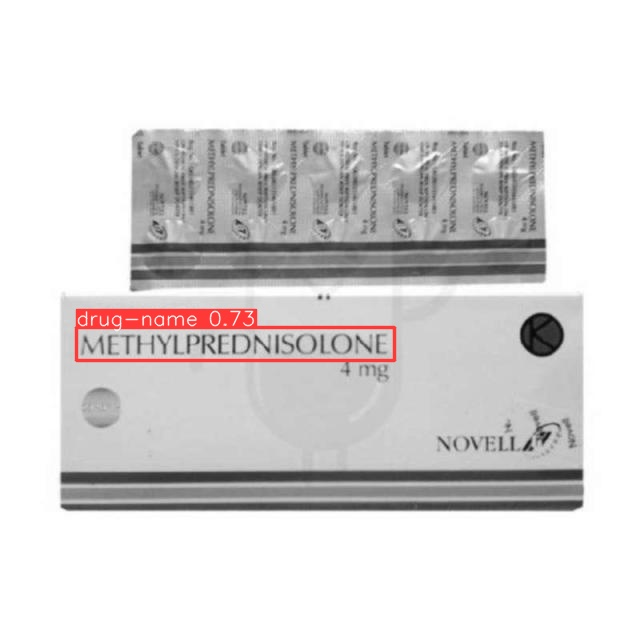

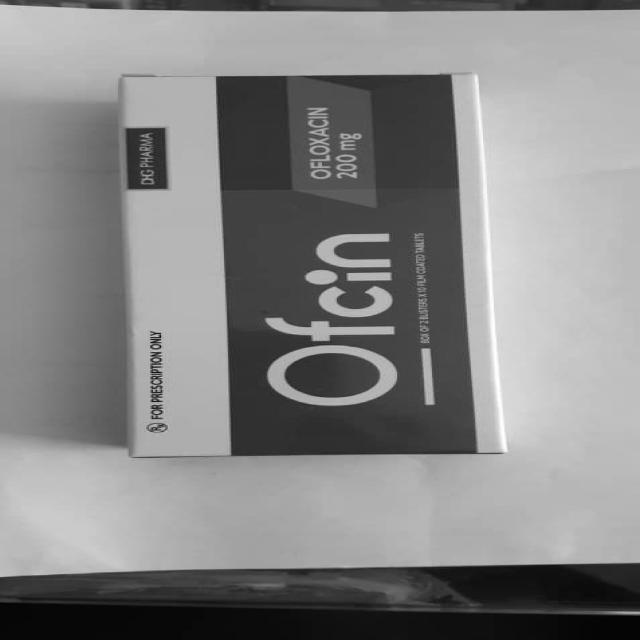

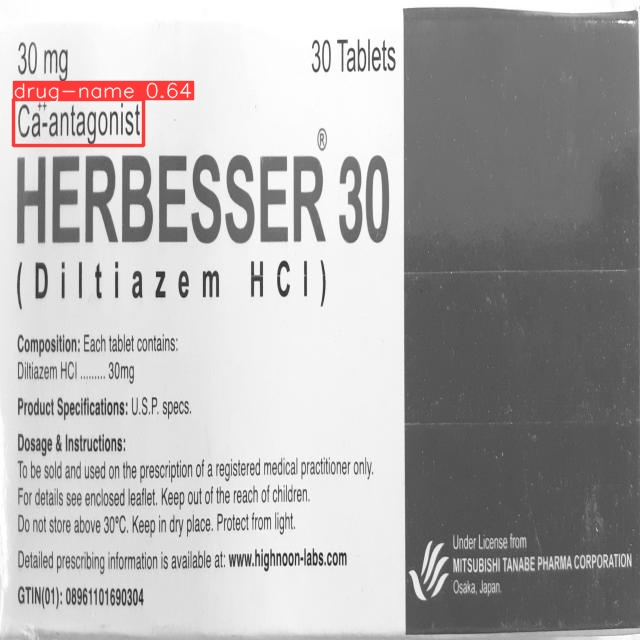

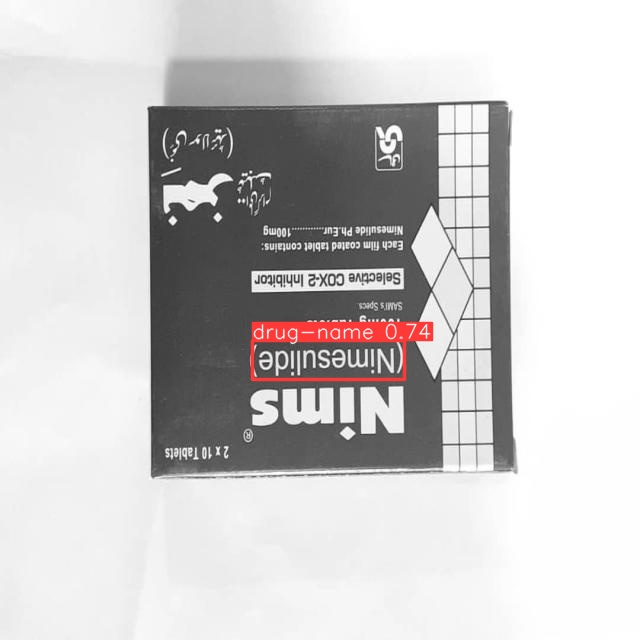

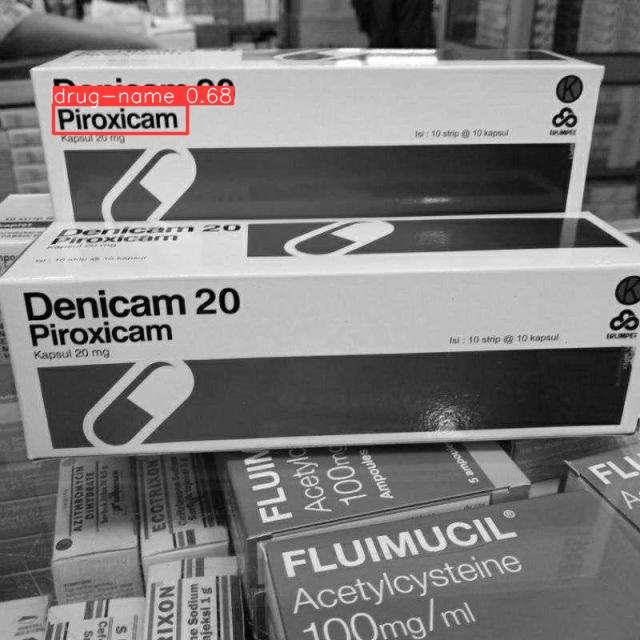

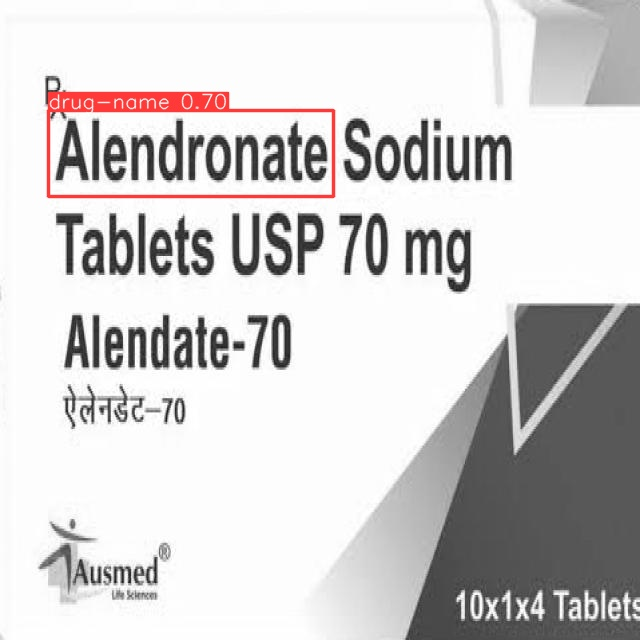

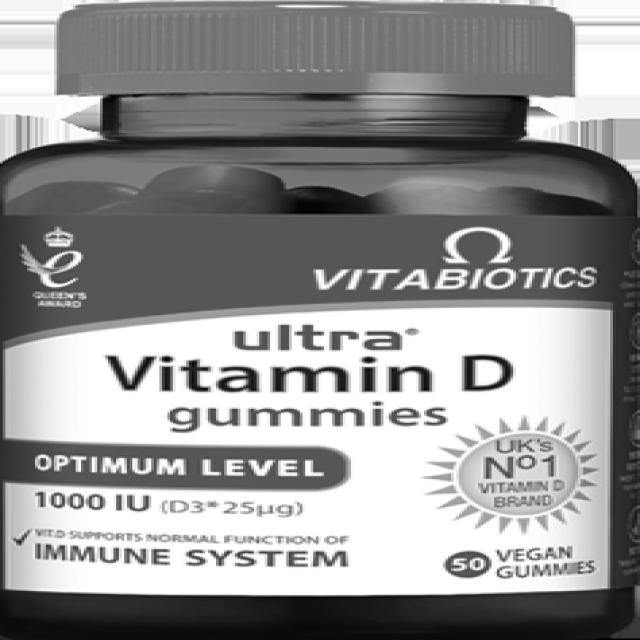

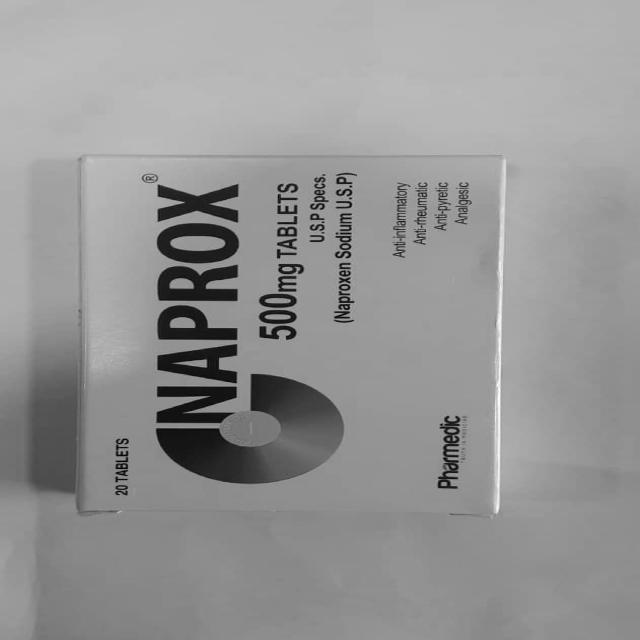

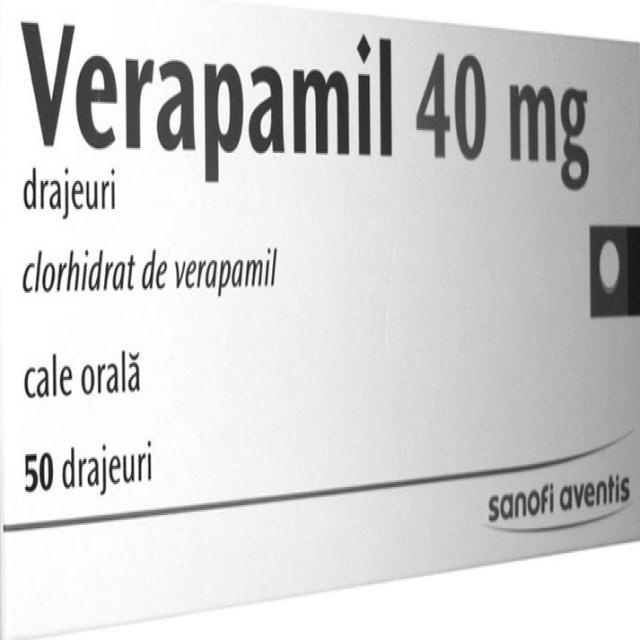

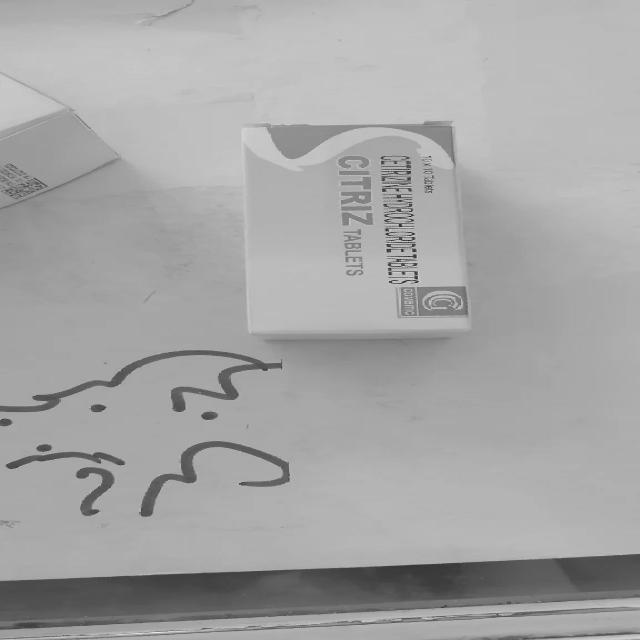

In [ ]:
#Display the Image
for image_path in glob.glob(f'/content/runs/detect/train23/*.jpg')[:10]:
      display(IPImage(filename=image_path, width=600))
      print("\n")